## Global Census Data Analysis

# Table of Contents

1. Introduction
2. Loading Data
3. Data Exploration
4. Data Cleaning and Processing
5. Exploratory Data Analysis
6. Data Visualization
7. Data Modeling
   - Logistic Regression 
   - Decision Tree Classifier
   - SVM
   - Naive Bayes(GaussianNB)
   - KNeighbors Classifier
   - Random Forests Classifier
   - Ada Boost Classifier
   - Gradient Boosting Classifier
8. Cross Validation
9. Conclusion

## 1. Introduction

To conduct exploratory analysis on the global census dataset, this report outlines the journey of exploring, cleaning, and analyzing the data using Python.
The primary focus of this exploration was to understand the structure of the dataset, address data cleanliness issues, and extract meaningful insights. As the analysis progressed, a pivotal decision was made to go beyond descriptive statistics and visualizations. Recognizing the predictive potential of the data, a model was implemented specifically targeting income levels. This decision was driven by the desire to not only understand historical patterns but also to forecast income trends.

## 2.Loading Data

In [64]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd
# Importing the numpy library for numerical operations and array manipulation
import numpy as np
# Importing the matplotlib and seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Importing the plotly express library for interactive visualizations
import plotly.express as px

In [65]:
#loading data
df = pd.read_csv('global_census (4).csv')
df.head()

,age,work_class,education,education_yrs,marital_status,occupation,family_relationship,race,gender,work_hours_weekly,nationality,income_level
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


## 3.Data Exploration

In [66]:
# The shape attribute of a DataFrame provides information about its dimensions.
df.shape

(48842, 12)

The dataset has 48,842 rows and 12 columns.

In [67]:
# Display concise information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  48842 non-null  int64 
 1   work_class           46043 non-null  object
 2   education            48842 non-null  object
 3   education_yrs        48842 non-null  int64 
 4   marital_status       48842 non-null  object
 5   occupation           46033 non-null  object
 6   family_relationship  48842 non-null  object
 7   race                 48842 non-null  object
 8   gender               48842 non-null  object
 9   work_hours_weekly    48842 non-null  int64 
 10  nationality          47985 non-null  object
 11  income_level         48842 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.5+ MB


In [68]:
#Descriptive Statistics for Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
education_yrs,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
work_hours_weekly,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


The dataset, with approximately 48,842 entries, indicates an average age of 38.64 years, education spanning 1 to 16 years (mean: 10.08), and an average work week of 40.42 hours (standard deviation: 12.39). 

In [69]:
#Checking for Missing Values
df.isnull().sum()

age                       0
work_class             2799
education                 0
education_yrs             0
marital_status            0
occupation             2809
family_relationship       0
race                      0
gender                    0
work_hours_weekly         0
nationality             857
income_level              0
dtype: int64

The output indicates the count of missing values in each column of the dataset. The 'work_class' column has 2,799 missing values, the 'occupation' column has 2,809, and the 'nationality' column has 857.

In [70]:
#Count the number of unique values in each column
df.nunique()

age                    74
work_class              8
education              16
education_yrs          16
marital_status          7
occupation             14
family_relationship     6
race                    5
gender                  2
work_hours_weekly      96
nationality            41
income_level            2
dtype: int64

Understanding the number of unique values in each column is essential for grasping the diversity and potential categorical nature of features, aiding in subsequent analysis and preprocessing steps.

In [71]:
# Count and display the number of duplicated rows
df.duplicated().sum()

7760

Having identified 7760 duplicated rows in the dataset and considering the absence of unique identifiers, it is imperative to emphasize that these duplications will not be eliminated during the data cleaning process. 

In [72]:
# Exploring Categorical Column - 'work_class'
df['work_class'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: work_class, dtype: int64


'Private' stands out as the most common work class, appearing 33,906 times. Since there are null values in the 'work_class' column, one potential method for handling these missing values is to use the mode of the column for imputation. Additionally , other approach is to categorize the data into smaller groups by combining related categories. This involves creating broader classifications, such as merging specific work class into more general categories. 

In [73]:
# Exploring Categorical Column - 'occupation'
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

The 'occupation' column displays diverse categories. 'Prof-specialty' is the most common (6,172 occurrences), while 'Armed-Forces' is infrequent (15 occurrences).

In [74]:
# Exploring Categorical Column - 'nationality'
df['nationality'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In the 'nationality' column, diverse categories are observed. The most frequent is 'United-States' with 43,832 occurrences, while 'Holand-Netherlands' is the least frequent, occurring only once.

In [75]:
# Exploring Categorical Column - 'income_level'
df['income_level'].value_counts()

<=50K    37155
>50K     11687
Name: income_level, dtype: int64

The 'income_level' column reveals that 37,155 individuals earn less than or equal to (<=50K), while 11,687 individuals earn more than $50,000 (>50K).

In [76]:
# Exploring Categorical Column - 'gender'
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

This breakdown provides an overview of the gender distribution in the dataset, indicating a higher representation of males.

In [77]:
# Exploring Categorical Column - 'race'
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

The 'race' column demonstrates diversity in the dataset, with the majority (41,762 entries) identifying as 'White.' 

In [78]:
# Exploring Categorical Column - 'education'
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

One approach to simplify the 'education' column is to categorize the various educational levels into broader groups, reducing the number of distinct categories. This consolidation simplifies the 'education' column, making it more manageable and providing a clearer representation of the overall educational levels.

In [79]:
# Exploring Categorical Column - 'marital_status'
df['marital_status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

Simplifying the 'marital_status' column entails grouping individuals into two categories: 'married' and 'single' and 'others'. This streamlined categorization offers a more concise representation of marital statuses for easier analysis.

In [80]:
# Exploring Categorical Column - 'family_relationship'
df['family_relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: family_relationship, dtype: int64

Simplifying the 'family_relationship' column entails grouping individuals into  a small categories.

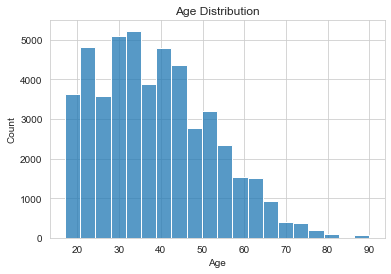

In [81]:
# Creating a histogram to visualize the distribution of 'age' using Seaborn
sns.histplot(df['age'], bins=20)
# Adding a title to the plot
plt.title('Age Distribution')
# Adding labels to the x and y axes
plt.xlabel('Age')
plt.ylabel('Count')
# Displaying the histogram plot
plt.show()

The histogram provides a comprehensive view of age distribution in the dataset, spanning from 17 to 90 years. A discernible trend is observed, characterized by a steady rise in counts up to approximately age 40, followed by a gradually  decline. Notably, there is a significant concentration of individuals, exceeding 5,000, within the age range of 30 to 40.

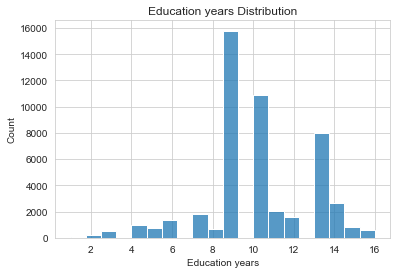

In [82]:
# Creating a histogram to visualize the distribution of 'education_yrs' using Seaborn
sns.histplot(df['education_yrs'], bins=20)

# Adding a title to the plot
plt.title('Education years Distribution')

# Adding labels to the x and y axes
plt.xlabel('Education years')
plt.ylabel('Count')

# Displaying the histogram plot
plt.show()

Clearly, a substantial majority of individuals have completed education spanning for approximately 9 years and 11 years.

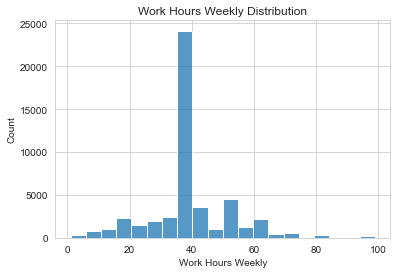

In [83]:
# Creating a histogram to visualize the distribution of 'work_hours_weekly' using Seaborn
sns.histplot(df['work_hours_weekly'], bins=20)

# Adding a title to the plot
plt.title('Work Hours Weekly Distribution')

# Adding labels to the x and y axes
plt.xlabel('Work Hours Weekly')
plt.ylabel('Count')

# Displaying the histogram plot
plt.show()

It is evident that a significant majority of individuals work approximately 40 hours per week.

## 4. Data Cleaning and Processing

In [84]:
# Checking the column names.
df.columns

Index(['age', 'work_class', 'education', 'education_yrs', 'marital_status',
       'occupation', 'family_relationship', 'race', 'gender',
       'work_hours_weekly', 'nationality', 'income_level'],
      dtype='object')

The column names are being checked to ascertain the presence of any spaces and to determine if renaming is necessary.

In [85]:
# Calculate and print the percentage of null values in the entire DataFrame
null_count = df.isnull().sum().sum()
print("{:.2f}".format((null_count / df.size) * 100)+ "%")

1.10%


Since the percentage of null values in our dataset is only 1.10%, it is reasonable to remove them instead of filling them with the mode. 

In [86]:
# Drop rows with missing values (NaN)
df.dropna(inplace = True)
# Verify the changes
print(df.isnull().sum())
# Print the updated shape
print('updated shape of the DataFrame' , df.shape)

age                    0
work_class             0
education              0
education_yrs          0
marital_status         0
occupation             0
family_relationship    0
race                   0
gender                 0
work_hours_weekly      0
nationality            0
income_level           0
dtype: int64
updated shape of the DataFrame (45222, 12)


In [87]:
# Replace null values in 'work_class' with its mode which is Private here
#df['work_class'].fillna(df['work_class'].mode()[0], inplace=True)

# Replace null values in 'occupation' with its mode which is Prof-specialty here
#df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

# Replace null values in 'nationality' with its mode which is United-States here
#df['nationality'].fillna(df['nationality'].mode()[0], inplace=True)

In [88]:
# Replace specific education levels with broader categories in the 'education' column
df.education = df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th'], 'No-Degree')
df.education = df.education.replace(['10th', '11th', '12th', 'HS-grad'], 'High-School')
df.education = df.education.replace('Some-college', 'College')
df.education = df.education.replace(['Assoc-acdm', 'Assoc-voc'], 'Associate')
df.education = df.education.replace(['Doctorate', 'Prof-school'], 'Doctorate')
# Display the counts for the updated 'education' categories
df['education'].value_counts()

High-School    18202
College         9899
Bachelors       7570
Associate       3466
Masters         2514
No-Degree       2242
Doctorate       1329
Name: education, dtype: int64

I simplified education categories in the 'education' column, merging specific levels into broader classifications for clarity. This included grouping 'Preschool' to '9th' as 'No-Degree,' '10th' to 'HS-grad' as 'High-School,' 'Some-college' as 'College,' and merging 'Assoc-acdm' and 'Assoc-voc' into 'Associate.' Similarly, 'Doctorate' and 'Prof-school' were combined as 'Doctorate.' The updated counts for each category provide a clearer representation of educational backgrounds in the dataset.

In [89]:
# Replace specific marital status  with broader categories in the 'marital_status' column
df.marital_status = df.marital_status.replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
df.marital_status = df.marital_status.replace('Never-married', 'Single')
df.marital_status = df.marital_status.replace(['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'], 'Others')
# Display the counts for the updated 'marital_status' categories
df['marital_status'].value_counts()

Married    21087
Single     14598
Others      9537
Name: marital_status, dtype: int64


Marital status categories in the 'marital_status' column were simplified for clarity. 'Married-civ-spouse' and 'Married-AF-spouse' were merged into 'Married,' 'Never-married' became 'Single,' and 'Divorced,' 'Separated,' 'Widowed,' and 'Married-spouse-absent' were grouped as 'Others.'

In [90]:
# Replace specific family_relationship with broader categories
df.family_relationship = df.family_relationship.replace(['Not-in-family', 'Own-child', 'Unmarried', 'Other-relative'], 'Others')
# Display the counts for the updated 'family_relationship' categories
df['family_relationship'].value_counts()

Others     24465
Husband    18666
Wife        2091
Name: family_relationship, dtype: int64


In simplifying family relationship representations, specific categories in the 'family_relationship' column were redefined into a broader classification, merging 'Not-in-family,' 'Own-child,' 'Unmarried,' and 'Other-relative' into 'Others.' Examining the updated counts provides a concise overview of family relationship categories in the dataset.

In [91]:
# Replace specific work class with broader categories in the 'work_class' column
df.work_class = df.work_class.replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc'], 'Private')
df.work_class = df.work_class.replace(['Local-gov','State-gov', 'Federal-gov'], 'Government')
df.work_class = df.work_class.replace(['Without-pay', 'Never-worked'], 'Unemployed')
# Display the counts for the updated 'work_class' categories
df['work_class'].value_counts()

Private       38749
Government     6452
Unemployed       21
Name: work_class, dtype: int64

In streamlining work class representations, specific categories in the 'work_class' column were redefined into broader classifications. 'Private,' 'Self-emp-not-inc,' and 'Self-emp-inc' were merged into 'Private,' while 'Local-gov,' 'State-gov,' and 'Federal-gov' became 'Government.' Additionally, 'Without-pay' and 'Never-worked' were grouped as 'Unemployed.' Examining the updated counts provides a clear distribution of work class categories in the dataset.

In [92]:
# Replace income level labels with numerical values
df.income_level = df.income_level.replace('<=50K', 0)
df.income_level = df.income_level.replace('>50K', 1)
# Display the counts for the updated 'income_level' categories
df['income_level'].value_counts()

0    34014
1    11208
Name: income_level, dtype: int64

In this step of the data cleaning process, I addressed the 'income_level' column, which originally contained categorical labels ('<=50K' and '>50K'). The transformation was carried out to facilitate the training of machine learning models, where numerical representations are often preferred.

In [93]:
df.head()

,age,work_class,education,education_yrs,marital_status,occupation,family_relationship,race,gender,work_hours_weekly,nationality,income_level
0,39,Government,Bachelors,13,Single,Adm-clerical,Others,White,Male,40,United-States,0
1,50,Private,Bachelors,13,Married,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,High-School,9,Others,Handlers-cleaners,Others,White,Male,40,United-States,0
3,53,Private,High-School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [95]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('Global Census Cleaned Data.csv', index = False)

The processed and cleaned dataset has been saved to a CSV file, preserving the integrity of the data and making it ready for subsequent analysis. This file serves as a reliable and organized source for future explorations, modeling, or any further data-related tasks.

## 5. Exploratory Data Analysis

In [33]:
df.corr()

,age,education_yrs,work_hours_weekly,income_level
age,1.000000,0.037623,0.101992,0.237040
education_yrs,0.037623,1.000000,0.146206,0.332800
work_hours_weekly,0.101992,0.146206,1.000000,0.227199
income_level,0.237040,0.332800,0.227199,1.000000


<AxesSubplot:>

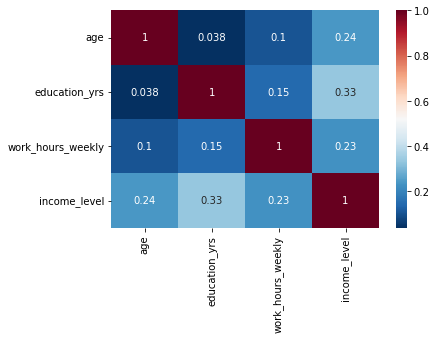

In [34]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r')

This report presents a correlation analysis of key variables within our dataset, specifically age, education years, weekly work hours, and income level. The correlation matrix sheds light on meaningful relationships:

- Age and Income Level (0.24): A moderate positive correlation suggests that, on average, income tends to increase with age.

- Education Years and Income Level (0.33): A more substantial positive correlation implies that higher education levels often lead to higher incomes.

- Weekly Work Hours and Income Level (0.23): There is a noteworthy positive correlation, emphasizing the impact of working more hours per week on income.

These insights offer a valuable understanding of the interplay between these variables, aiding in the interpretation of patterns and potential factors influencing income levels in our dataset.

## 6. Data Visualization

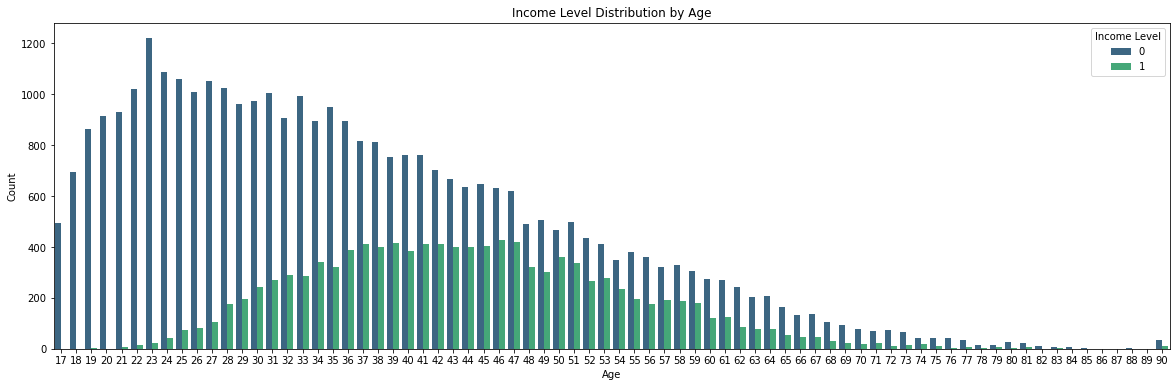

In [35]:
# Creating a subplot with a specific size
fig, ax = plt.subplots(figsize=(20, 6))
# Generating a count plot to visualize the distribution of 'age' with respect to 'income_level'
sns.countplot(x='age', palette='viridis', hue='income_level', data=df, ax=ax)
# Adding title and axis labels to the plot
plt.title('Income Level Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
# Adding a legend to distinguish 'income_level'
plt.legend(title='Income Level', loc='upper right')
# Displaying the plot
plt.show()

The age distribution histogram in the dataset covers a range from 17 to 90 years, offering a detailed perspective on income levels. 
Notably, individuals earning more than $50,000 are predominantly in the age range of approximately 35 to 50 years.
In contrast, those earning less than $50,000 start as early as 17 years old, peak at 23 years old with around 1,200 individuals, and then gradually decline over the subsequent years. 
This increase might be because of things like having more education, getting higher job positions, or other factors that affect how much money someone makes during this part of their life.
This analysis aims to uncover the underlying factors contributing to the income trends within this age group.

C:\Users\shirz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shirz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


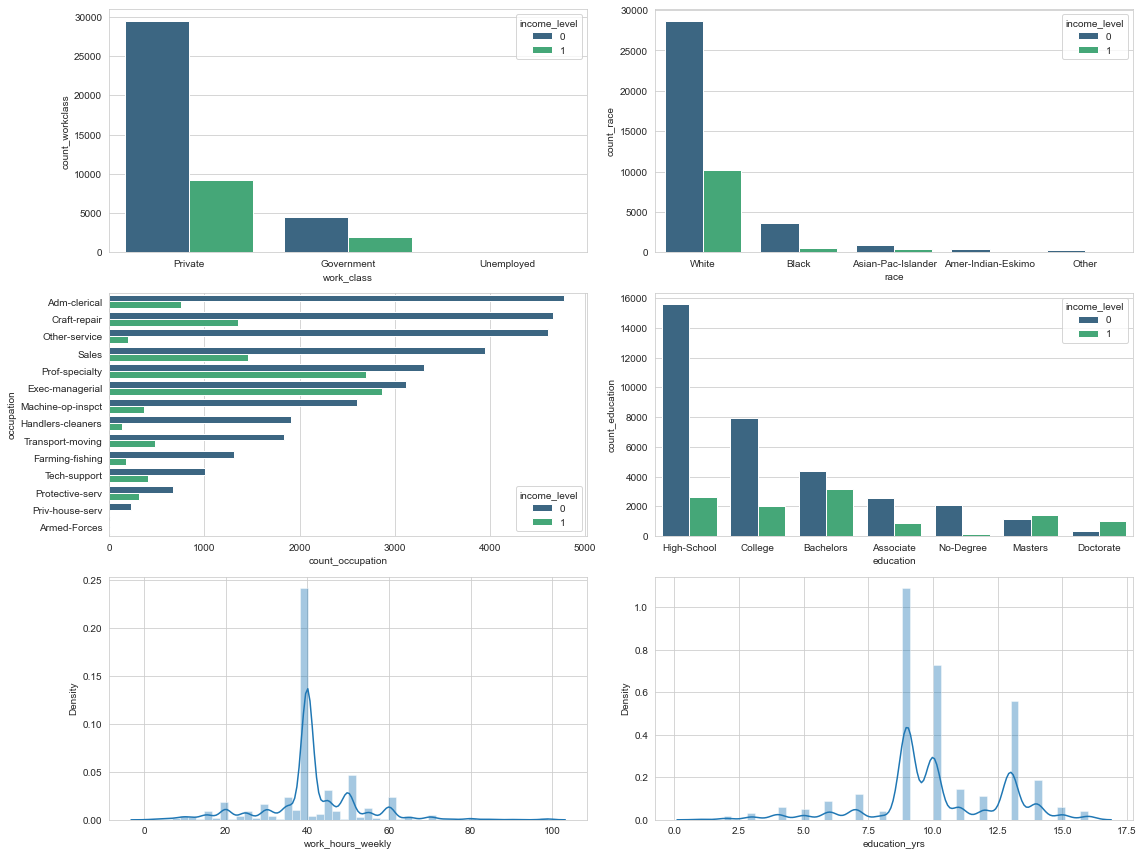

In [36]:
# Group the data by workclass and income
by_workclass = df.groupby(['work_class', 'income_level']).size().reset_index(name='count_workclass')
# Group the data by education and income
by_education = df.groupby(['education', 'income_level']).size().reset_index(name='count_education')
# Group the data by occupation and income
by_occupation = df.groupby(['occupation', 'income_level']).size().reset_index(name='count_occupation')
# Group the data by race and income
by_race = df.groupby(['race', 'income_level']).size().reset_index(name='count_race')

# Create the bar charts with sorting and horizontal bars
sns.set_style('whitegrid')
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
sns.barplot(x='work_class', y='count_workclass', hue='income_level', palette='viridis', data=by_workclass.sort_values(by='count_workclass', ascending=False), ax=axs[0, 0])
sns.barplot(x='race', y='count_race', hue='income_level', palette='viridis', data=by_race.sort_values(by='count_race', ascending=False), ax=axs[0, 1])
sns.barplot(y='occupation', x='count_occupation', hue='income_level', palette='viridis', data=by_occupation.sort_values(by='count_occupation', ascending=False), ax=axs[1, 0])
sns.barplot(x='education', y='count_education', hue='income_level', palette='viridis', data=by_education.sort_values(by='count_education', ascending=False), ax=axs[1, 1])
sns.distplot(df.work_hours_weekly, ax=axs[2, 0])
sns.distplot(df.education_yrs, ax=axs[2, 1])

plt.tight_layout()
plt.show()

Examining our dataset uncovers noteworthy trends across various dimensions. The bar charts distinctly reveal a majority identifying as White Americans in our dataset, notably illuminated in the Race chart showcasing income levels across different racial groups. When juxtaposed with the Education chart, it becomes evident that a significant portion of this demographic opts for employment opportunities with educational backgrounds ranging from high school diplomas to some college education. To underscore this correlation, the addition of a mixed line/bar chart for education years provides an extra layer of emphasis.
Comparatively, the Work Class chart indicates a preference for private-sector employment over government jobs among individuals in the dataset. Notably, the unemployment rate appears negligible, indicating a predominantly employed population. Furthermore, the Occupation chart highlights popular job choices like prof-specialty, craft repair, sales, adm-clerical, and executive-managerial. However, it's crucial to note that these choices don't necessarily translate to higher income, as individuals with lower incomes may tend to work in these fields more frequently than those with higher incomes. Understanding that job choices and income aren't always directly linked is essential in interpreting this dataset.
Finally, the analysis of the 'work hours weekly' variable reveals that most individuals in our dataset work approximately 40 hours per week. These insights provide a succinct yet comprehensive overview of the demographic composition, employment trends, and work habits within our dataset.


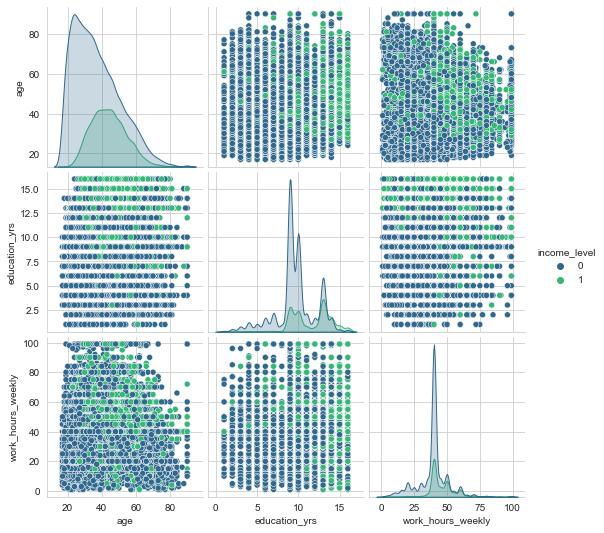

In [37]:
# Create a pair plot to visualize relationships between numerical columns, colored by income level
sns.pairplot(df, hue = "income_level", palette='viridis')

The pair plot examines relationships within our dataset, focusing on three numeric columns. Scatter plots in each subplot reveal potential correlations and patterns. Color distinctions, tied to 'income_level,' offer a quick view of how numeric variables relate to income. Notably, individuals earning over $50,000 tend to have higher education years, typically aged 25 to 50, and work standard hours around 30 to 50.

C:\Users\shirz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


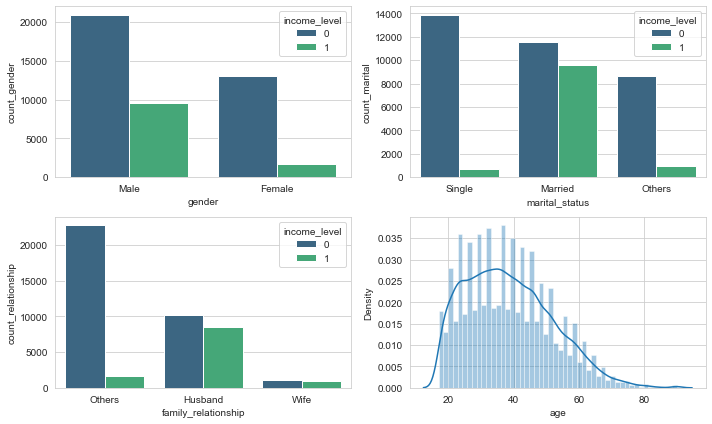

In [38]:
# Group the data by gender and income
by_gender = df.groupby(['gender', 'income_level']).size().reset_index(name='count_gender')
# Group the data by marital status and income
by_marital = df.groupby(['marital_status', 'income_level']).size().reset_index(name='count_marital')
# Group the data by relationship and income
by_relationship = df.groupby(['family_relationship', 'income_level']).size().reset_index(name='count_relationship')

# Create the bar charts with sorting and horizontal bars
sns.set_style('whitegrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
sns.barplot(x='gender', y='count_gender', hue='income_level', palette='viridis', data=by_gender.sort_values(by='count_gender', ascending=False), ax=axs[0, 0])
sns.barplot(x='marital_status', y='count_marital', hue='income_level', palette='viridis', data=by_marital.sort_values(by='count_marital', ascending=False), ax=axs[0, 1])
sns.barplot(x='family_relationship', y='count_relationship', hue='income_level', palette='viridis', data=by_relationship.sort_values(by='count_relationship', ascending=False), ax=axs[1, 0])
sns.distplot(df.age, ax=axs[1, 1])
plt.tight_layout()
plt.show()

An in-depth analysis of our dataset uncovers noteworthy trends. The Gender bar chart distinctly illustrates a majority identifying as male in both income levels. Aligning with this, the family relationship chart highlights that husbands typically serve as the primary earners within families compared to wives. Shifting the focus to the marital status chart, a compelling correlation emerges: most individuals who are married tend to receive higher incomes.

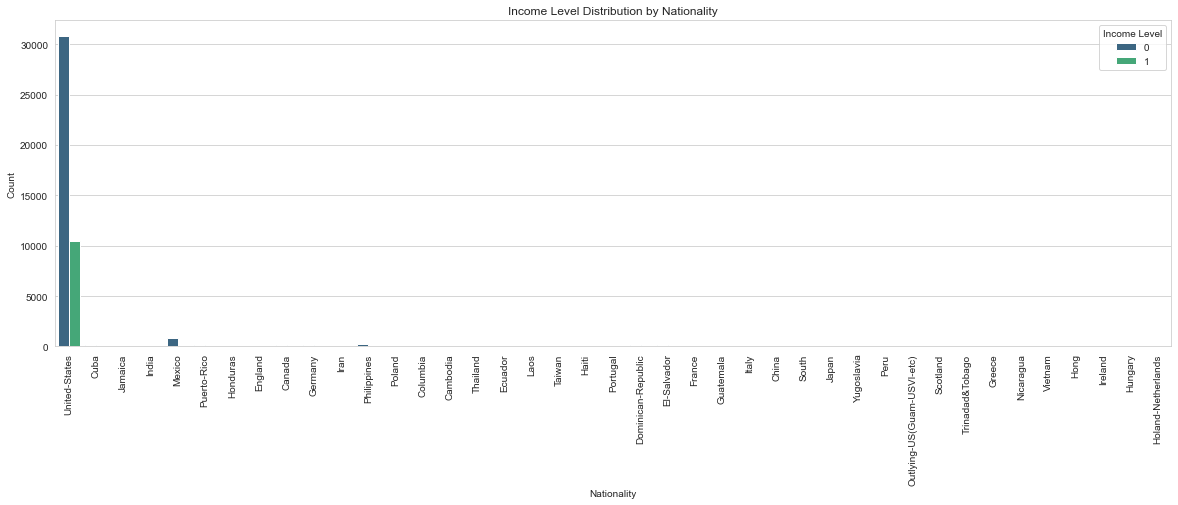

In [39]:
# Creating a subplot with a specified size
fig, ax = plt.subplots(figsize=(20, 6))
# Generating a count plot to visualize the distribution of 'income_level' with respect to 'nationality' using Seaborn
sns.countplot(x='nationality', palette='viridis', hue='income_level', data=df, ax=ax)
# Adding a title to the plot
plt.title('Income Level Distribution by Nationality')
# Adding labels to the x and y axes
plt.xlabel('Nationality')
plt.ylabel('Count')
# Rotating x-axis labels for better visibility
plt.xticks(rotation=90)
# Adding a legend to distinguish between 'income_level'
plt.legend(title='Income Level', loc= 'upper right')
# Displaying the count plot
plt.show()

The bar chart illustrates the distribution of nationalities in our dataset. The United States dominates, with a substantial count of individuals in both income levels. Following closely are Mexico and the Philippines.

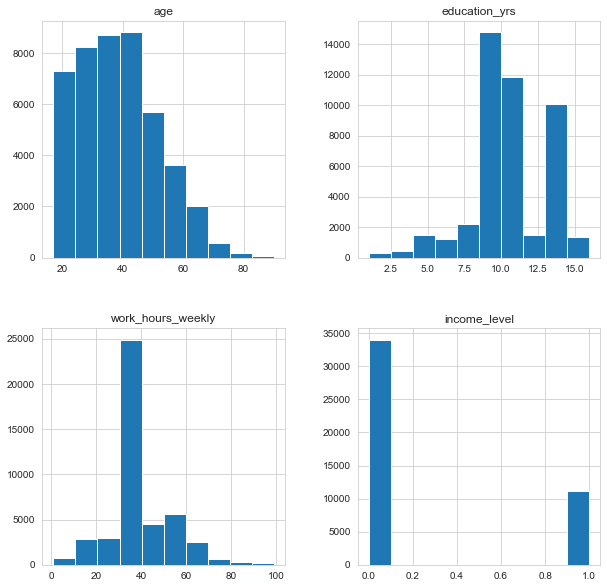

In [40]:
# Create a histogram grid for numeric columns 
df.hist(figsize = (10, 10), layout = (2,2), sharex = False);

### Outlier Identification

Outlier identification is then undertaken in our dataset, and the appropriate strategy for handling them is determined. The interpretation of outliers is facilitated through the utilization of visualizations, particularly boxplots. As part of this process, boxplots are generated for our numerical columns, resulting in the visual representation shown below.

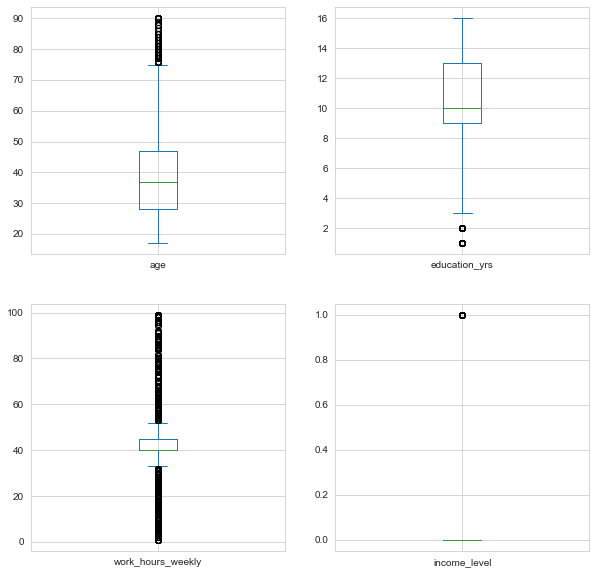

In [41]:
#To identify and visualize outliers in data, we use box plots
df.plot(kind = 'box', figsize =(10,10), layout= (2,2), sharex = False, subplots = True);

Given box plots offer a visual representation of the distribution and key statistical measures of three critical variables: age, education years, and weekly work hours.
- Age Distribution: The data for age spans a wide range, from 17 to 90 years, with a mean age of 39.3 years. The distribution is slightly right skewed, as the mean exceeds the median (38 years). The interquartile range (IQR) indicates that most individuals fall between the ages of 29 and 48 years, with outliers beyond this range.
- Education Years: The average education years is approximately 10.1 years, with a standard deviation of 2.64. The distribution is relatively symmetrical, with a median of 10 years and an interquartile range spanning from 9 to 13 years. Outliers with fewer education years are present, suggesting a subgroup with less formal education.

- Weekly Work Hours: The average weekly work hours are around 41.1 hours, with a standard deviation of 12.58. The distribution is balanced, as the mean and median both stand at 40 hours. The interquartile range extends from 40 to 45 hours, with outliers beyond this range indicating individuals working significantly longer hours.
- Income Level Distribution: The income level distribution indicates that, on average, 24% of individuals in the dataset have an income level above $50,000. The majority fall into the lower income category (coded as 0), reflecting the imbalanced nature of the dataset.

In summary, box plots provide a concise overview of the central tendency, spread, and presence of outliers in each variable. These visualizations facilitate a quick understanding of the dataset's characteristics, aiding in the identification of patterns and potential factors influencing income levels.

In [42]:
from scipy import stats
# Calculate Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['number'])))
# Define the threshold for considering a data point as an outlier
zscore_threshold = 3
# Identify rows containing outliers
outlier_rows = (z_scores > zscore_threshold).any(axis=1)
# Calculate the number of rows with outliers
num_outlier_rows = sum(outlier_rows)
# Display the number of rows with outliers
print(f"Number of rows with outliers: {num_outlier_rows}")
# Calculate the number of rows with income less than 50K$ and higher than 50K$
income_less_50k = df[df['income_level'] == 0]
income_greater_50k = df[df['income_level'] == 1]
# Display the number of rows with income less than 50K$ and higher than 50K$
print(f"Rows with income less than 50K$: {len(income_less_50k)}")
print(f"Rows with income greater than 50K$: {len(income_greater_50k)}")
# Calculate the number of rows to be removed based on the threshold value
rows_to_remove = sum(outlier_rows)
print(f"Number of rows to be removed: {rows_to_remove}")
# Display the impact on the imbalance
print("Impact on imbalance:")
if len(income_greater_50k) > 0:
    print(f"Before removing outliers - Imbalance: {len(income_less_50k) / len(income_greater_50k)}")
    print(f"After removing outliers - Imbalance: {(len(income_less_50k) - rows_to_remove) / len(income_greater_50k)}")
else:
    print("No rows with income greater than 50K$; cannot calculate imbalance.")
# Make a decision based on the impact
if rows_to_remove > 0:
    print("Decision: Keeping the rows with outliers and proceeding with the next steps.")
else:
    print("Decision: No rows to be removed; proceeding with the next steps.")

Number of rows with outliers: 1066
Rows with income less than 50K$: 34014
Rows with income greater than 50K$: 11208
Number of rows to be removed: 1066
Impact on imbalance:
Before removing outliers - Imbalance: 3.034796573875803
After removing outliers - Imbalance: 2.9396859386152747
Decision: Keeping the rows with outliers and proceeding with the next steps.


#### Navigating Outliers:
In the process of examining our data, certain values that stand out from the usual patterns were identified, known as outliers. To pinpoint these outliers, a statistical measure called Z-score was employed, providing insight into how far a data point is from the average.

Upon applying this analysis, 1066 rows in our dataset were found to fall into the outlier category. Now, the question arises: should these outlier rows be excluded? To decide, the potential consequences need to be considered.

The original dataset consists of 34,014 rows where income is less than 50K$ and 11,208 rows where income exceeds 50K$. If the decision is made to remove the identified outliers, 1066 rows would be lost. This loss might disrupt the balance of the dataset.

Currently, the dataset has about 3.03 times more rows with income less than 50K$ compared to those with income greater than 50K$. Removing the outliers would slightly alter this ratio to around 2.93.

Given these considerations, the decision is made to retain the outlier rows and proceed with the analysis. This choice is based on the belief that the outlier rows contain valuable information, and the potential imbalance that might result is deemed acceptable for the broader objectives of the analysis.

In [44]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

Considering the requirement of 'int/float' format input for many classification models, which do not support 'string' data, the utilization of 'Label Encoder' becomes essential to encode categorical columns.

In [45]:
# Create a new DataFrame df1 as a copy of df and apply LabelEncoder to encode categorical variables
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)

# Display the first 10 rows of the transformed DataFrame
df1.head(5)

,age,work_class,education,education_yrs,marital_status,occupation,family_relationship,race,gender,work_hours_weekly,nationality,income_level
0,22,0,1,12,2,0,1,4,1,39,38,0
1,33,1,1,12,0,3,0,4,1,12,38,0
2,21,1,4,8,1,5,1,4,1,39,38,0
3,36,1,4,6,0,5,0,2,1,39,38,0
4,11,1,1,12,0,9,2,2,0,39,4,0


In [46]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
s = StandardScaler()
# Apply StandardScaler to scale the features and prepare the input features (X) and target variable (y)
X = s.fit_transform(df1.drop('income_level', axis=1))
y = df1['income_level']

### Rescaling the Data

To ensure uniformity in scale across the dataset, the next stage involves standardizing the data. Given the presence of columns with varying value ranges, ranging from very small to high values, this process becomes crucial for optimal model learning.

In this context, I employ the Standard Scaler – a technique that adheres to the Standard Normal Distribution (SND). Consequently, it sets the mean to 0 and scales the data to exhibit unit variance. This standardization facilitates improved model learning by ensuring that all features are on a comparable scale.

## 7. Data Modeling

In the data modeling phase, various machine learning models were employed to model the dataset. These models include Logistic Regression, Decision Tree Classifier, Support Vector Machine (SVM), Naive Bayes (GaussianNB), Random Forest Classifier, Ada Boost Classifier, and Gradient Boosting Classifier. 

In [47]:
# Import train_test_split from scikit-learn model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
print('training set has {} samples.'.format(X_train.shape[0]))
print('testing set has {} samples.'.format(X_test.shape[0]))

training set has 31655 samples.
testing set has 13567 samples.


In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report

# Logistic regression 

In [50]:
# Import LogisticRegression from scikit-learn linear_model
from sklearn.linear_model import LogisticRegression
# Initialize Logistic Regression classifier
lr_clf = LogisticRegression()
# Fit the classifier on the training data
lr_clf.fit(X_train, y_train)
# Predict the target variable on the test set
y_pred = lr_clf.predict(X_test)

# Print the accuracy of the Logistic Regression model
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred))
print('classification_report:\n\n', classification_report(y_test, y_pred))

Accuracy: 81.86
Confusion Matrix:

 [[9449  744]
 [1717 1657]]
classification_report:

               precision    recall  f1-score   support

           0       0.85      0.93      0.88     10193
           1       0.69      0.49      0.57      3374

    accuracy                           0.82     13567
   macro avg       0.77      0.71      0.73     13567
weighted avg       0.81      0.82      0.81     13567



The model achieved an accuracy of 81.86%, with Class 0 showing strong performance and Class 1 indicating challenges in identification. The macro and weighted averages provide concise insights into the overall model performance, addressing both balanced and imbalanced aspects.

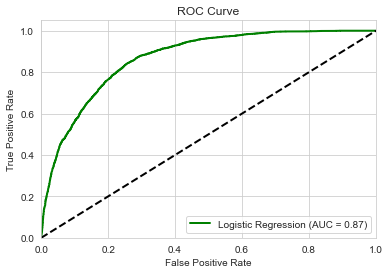

In [51]:
#predicted probabilities Logistic Regression model
lr_prob = lr_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, lr_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier

In [52]:
# Import DecisionTreeClassifier from scikit-learn tree module
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dtc = DecisionTreeClassifier()

# Fit the classifier on the training data
dtc.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred2 = dtc.predict(X_test)

# Print the accuracy of the Decision Tree model
print('Accuracy:', round(accuracy_score(y_test, y_pred2) * 100, 2))

# Print the confusion matrix
print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred2))

# Print the classification report
print('Classification Report:\n\n', classification_report(y_test, y_pred2))

Accuracy: 78.16
Confusion Matrix:

 [[8823 1370]
 [1593 1781]]
Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.87      0.86     10193
           1       0.57      0.53      0.55      3374

    accuracy                           0.78     13567
   macro avg       0.71      0.70      0.70     13567
weighted avg       0.78      0.78      0.78     13567



## SVM

In [53]:
# Import Support Vector Machine (SVM) classifier
from sklearn.svm import SVC

# Create an SVM model with a radial basis function (RBF) kernel and probability estimates
svm_model = SVC(kernel="rbf", probability=True)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Print evaluation metrics for the SVM model
print('SVM Model - Accuracy:', round(accuracy_score(y_test, y_pred_svm) * 100, 2))
print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred_svm))
print('Classification Report:\n\n', classification_report(y_test, y_pred_svm))

SVM Model - Accuracy: 82.28
Confusion Matrix:

 [[9504  689]
 [1715 1659]]
Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.93      0.89     10193
           1       0.71      0.49      0.58      3374

    accuracy                           0.82     13567
   macro avg       0.78      0.71      0.73     13567
weighted avg       0.81      0.82      0.81     13567



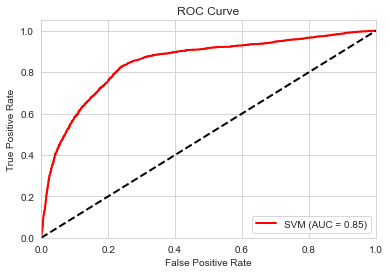

In [54]:
#predicted probabilities SVM model
svm_prob = svm_model.predict_proba(X_test)[:, 1]

#false positive rate, true positive rate, and AUC
svm_fpr, svm_tpr, _= roc_curve(y_test, svm_prob)
svm_roc_auc = auc(svm_fpr, svm_tpr)

#ROC curve
plt.plot(svm_fpr, svm_tpr, color='red', lw=2, label='SVM (AUC = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## GaussianNB

In [55]:
from sklearn.naive_bayes import GaussianNB
# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the classifier on the training data
gnb.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_gnb = gnb.predict(X_test)

# Print the accuracy of the Gaussian Naive Bayes model
print('Accuracy:', round(accuracy_score(y_test, y_pred_gnb) * 100, 2))
print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred_gnb))
print('Classification Report:\n\n', classification_report(y_test, y_pred_gnb))

Accuracy: 76.56
Confusion Matrix:

 [[7932 2261]
 [ 919 2455]]
Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.78      0.83     10193
           1       0.52      0.73      0.61      3374

    accuracy                           0.77     13567
   macro avg       0.71      0.75      0.72     13567
weighted avg       0.80      0.77      0.78     13567



## KNeighbors Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Fit the classifier on the training data
knn.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_knn = knn.predict(X_test)

# Print the accuracy of the K-Nearest Neighbors model
print('Accuracy:', round(accuracy_score(y_test, y_pred_knn) * 100, 2))
print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred_knn))
print('Classification Report:\n\n', classification_report(y_test, y_pred_knn))

Accuracy: 81.04
Confusion Matrix:

 [[9101 1092]
 [1480 1894]]
Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.89      0.88     10193
           1       0.63      0.56      0.60      3374

    accuracy                           0.81     13567
   macro avg       0.75      0.73      0.74     13567
weighted avg       0.80      0.81      0.81     13567



## Random Forest Classifier

In [57]:
# Import RandomForestClassifier from scikit-learn ensemble module
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rfc = RandomForestClassifier()

# Fit the classifier on the training data
rfc.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred1 = rfc.predict(X_test)

# Print the accuracy of the Random Forest model
print('Accuracy:', round(accuracy_score(y_test, y_pred1) * 100, 2))

# Print the confusion matrix
print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred1))

# Print the classification report
print('Classification Report:\n\n', classification_report(y_test, y_pred1))

Accuracy: 81.01
Confusion Matrix:

 [[9091 1102]
 [1475 1899]]
Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.89      0.88     10193
           1       0.63      0.56      0.60      3374

    accuracy                           0.81     13567
   macro avg       0.75      0.73      0.74     13567
weighted avg       0.80      0.81      0.81     13567



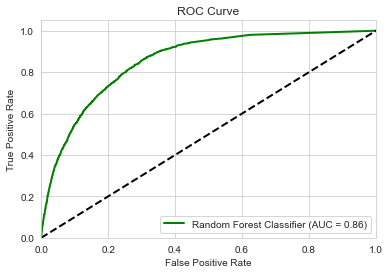

In [58]:
lr_prob = rfc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, lr_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=2, label='Random Forest Classifier (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## AdaBoost Classifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize AdaBoostClassifier
ad = AdaBoostClassifier()

# Fit the classifier on the training data
ad.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_ad = ad.predict(X_test)

# Print the accuracy of the AdaBoostClassifier model
print('Accuracy:', round(accuracy_score(y_test, y_pred_ad) * 100, 2))
print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred_ad))
print('Classification Report:\n\n', classification_report(y_test, y_pred_ad))

Accuracy: 83.24
Confusion Matrix:

 [[9401  792]
 [1482 1892]]
Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.92      0.89     10193
           1       0.70      0.56      0.62      3374

    accuracy                           0.83     13567
   macro avg       0.78      0.74      0.76     13567
weighted avg       0.82      0.83      0.83     13567



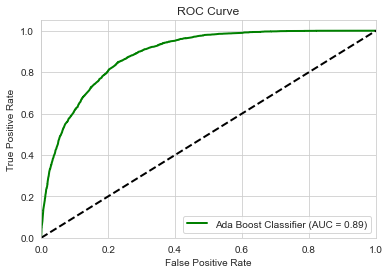

In [60]:
lr_prob = ad.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, lr_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=2, label='Ada Boost Classifier (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize GradientBoostingClassifier
gd = GradientBoostingClassifier()

# Fit the classifier on the training data
gd.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_gd = gd.predict(X_test)

# Print the accuracy of the GradientBoostingClassifier model
print('Accuracy:', round(accuracy_score(y_test, y_pred_gd) * 100, 2))
print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred_gd))
print('Classification Report:\n\n', classification_report(y_test, y_pred_gd))

Accuracy: 83.51
Confusion Matrix:

 [[9416  777]
 [1460 1914]]
Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.92      0.89     10193
           1       0.71      0.57      0.63      3374

    accuracy                           0.84     13567
   macro avg       0.79      0.75      0.76     13567
weighted avg       0.83      0.84      0.83     13567



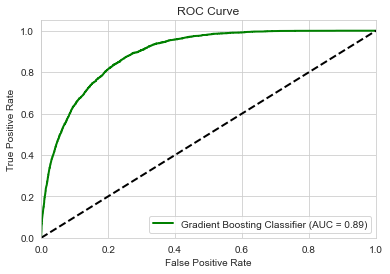

In [62]:
lr_prob = gd.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, lr_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=2, label='Gradient Boosting Classifier (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

After a thorough evaluation of multiple classification models, Gradient Boosting stands out as the most favorable choice. With precision values of 0.87 and 0.71 for income classes <=50k and >50k, respectively, along with corresponding recall values of 0.92 and 0.57, Gradient Boosting consistently outperforms its counterparts. Achieving an overall accuracy of 0.84, it surpasses alternative models, and its macro and weighted average precision, recall, and F1 scores consistently outshine competitors. These numerical insights affirm Gradient Boosting as the superior model for our classification task, aligning to maximize predictive accuracy and robust performance.

## 8. Cross validation

In [63]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cross_val_scores = cross_val_score(gd, X_train, y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print('Cross-Validation Scores:', cross_val_scores)
print('Mean Accuracy:', round(cross_val_scores.mean() * 100, 2))

Cross-Validation Scores: [0.8357549  0.83607075 0.82533165 0.83670246 0.82375237 0.83475513
 0.83254344 0.83949447 0.8328594  0.83159558]
Mean Accuracy: 83.29


The objective of cross-validation was to thoroughly assess the model's predictive performance on unseen data, ensuring robust generalization beyond the training set. The cross-validation process involved splitting the dataset into multiple folds, training the model on subsets, and evaluating its performance on different holdout sets. The mean accuracy of 83.29% further affirms the model's ability to generalize well to new and unseen data. By performing cross-validation, potential issues such as overfitting or selection bias were aimed to be mitigated, ensuring that Gradient Boosting maintains its predictive efficacy when applied to independent datasets. The solid mean accuracy score of 83.29% provides confidence in the model's reliability and robustness for our classification task.

# 9. Conclusion

In summary, our exploration of the Global Census dataset, encompassing 48,842 entries and 12 columns, has unveiled significant insights into the determinants of individuals' income levels. Prioritizing the income level variable, our predictive models, notably Gradient Boosting, achieved an impressive 83.29% accuracy through cross-validation. Noteworthy patterns surfaced, underscoring the influential roles of education, occupation, and work hours in shaping income outcomes. The demonstrated robust generalization of our models to unseen data enhances their reliability for future predictions. Combined with the preceding analysis, this report lays a solid foundation for comprehending income disparities, hinting at promising avenues for further exploration. In essence, our findings provide a data-driven framework that contributes to a nuanced understanding and predictive capability regarding income levels within the context of the Global Census data.